In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
company_tweets = pd.read_csv("datasets/techTweets/Company_Tweet.csv")
tweet = pd.read_csv("datasets/techTweets/Tweet.csv")

In [4]:
tweets = pd.merge(company_tweets, tweet, on='tweet_id', how='inner')
tweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [5]:
sentences = tweets['body']
sentences.head()

0    #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
1    #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...
2    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
3    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
4    #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...
Name: body, dtype: object

In [6]:
def negativityCheck(sentence):
    # return int(analyzer.polarity_scores(sentence)["neg"]>0.4)
    return 1
        

In [7]:
tweets["negative_sentiment"] = pd.DataFrame(sentences.apply(negativityCheck).tolist())
tweets.head(30)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1
5,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0,1
6,550802957370159104,AAPL,WaltLightShed,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,1
7,550802855129382912,AAPL,2waystrading,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,1
8,550802745737768960,AAPL,TV_TradingIdeas,1420156582,Will $AAPL Give Second entry opportunity? $AAP...,0,0,0,1
9,550797494188142592,AAPL,Weeklyoptions,1420155330,We will book gains in half dozen picks tomorro...,0,0,1,1


In [8]:
negativeTweets = tweets.loc[tweets["negative_sentiment"]==1]
negativeAppleTweets = negativeTweets.loc[negativeTweets["ticker_symbol"]=='AAPL']

In [9]:
import datetime
negativeAppleTweets['Date'] = pd.to_datetime(negativeAppleTweets['post_date'],unit='s').dt.strftime('%d-%m-%Y')

<ipython-input-9-bcbf7241b00a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negativeAppleTweets['Date'] = pd.to_datetime(negativeAppleTweets['post_date'],unit='s').dt.strftime('%d-%m-%Y')


In [10]:
negativeAppleTweets.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,negative_sentiment,Date
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,1,01-01-2015
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,1,01-01-2015
5,550803225113157632,AAPL,MacHashNews,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0,1,01-01-2015
6,550802957370159104,AAPL,WaltLightShed,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,1,01-01-2015
7,550802855129382912,AAPL,2waystrading,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,1,01-01-2015


In [11]:
negativeAppleTweets.shape

(1425013, 10)

In [12]:
tweetsOnAppleDateCount= negativeAppleTweets["Date"].value_counts()
tweetsOnAppleDateCount = pd.DataFrame(tweetsOnAppleDateCount).reset_index()
tweetsOnAppleDateCount.rename(columns={"index": "Date", "Date": "NegativeTweets"}, inplace=True)
tweetsOnAppleDateCount['Date'] = pd.to_datetime(tweetsOnAppleDateCount['Date'], format='%d-%m-%Y')
tweetsOnAppleDateCount.sort_values("Date", inplace=True)
tweetsOnAppleDateCount.set_index("Date",inplace=True)
tweetsOnAppleDateCount.head()


,NegativeTweets
Date,
2015-01-01,299
2015-01-02,867
2015-01-03,346
2015-01-04,406
2015-01-05,1147


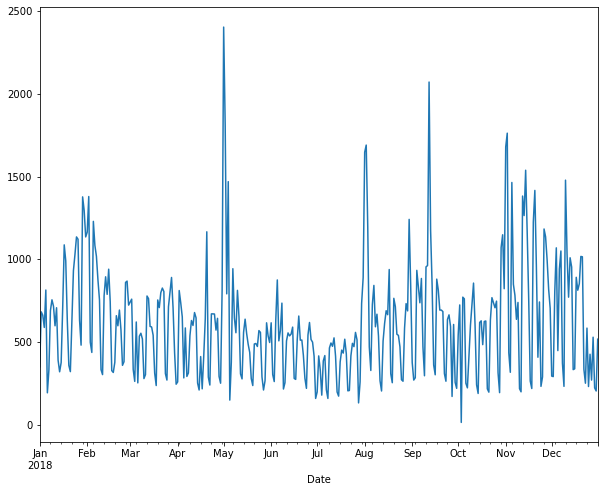

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

ax= tweetsOnAppleDateCount.loc['2018-01-01':'2018-12-31',"NegativeTweets"].plot()